<a href="https://colab.research.google.com/github/104Rajendraprasath/Climate-Change-Prediction/blob/main/Climate_Change_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

### LOADING THE DATASET


In [ ]:
df = pd.read_csv('/content/climate_change_data.csv')

In [ ]:
df

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
...,...,...,...,...,...,...,...,...,...
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255


DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6279 entries, 0 to 6278
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6279 non-null   object 
 1   Location        6279 non-null   object 
 2   Country         6278 non-null   object 
 3   Temperature     6278 non-null   float64
 4   CO2 Emissions   6278 non-null   float64
 5   Sea Level Rise  6278 non-null   float64
 6   Precipitation   6278 non-null   float64
 7   Humidity        6278 non-null   float64
 8   Wind Speed      6278 non-null   float64
dtypes: float64(6), object(3)
memory usage: 441.6+ KB


CHECKING NULL VALUES

In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
Country,1
Temperature,1
CO2 Emissions,1
Sea Level Rise,1
Precipitation,1
Humidity,1
Wind Speed,1


STATISTICAL DESCRIPITION

In [ ]:
df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


CONVERTING Date COLUMN INTO PROPER FORMATE

REMOVING NULL VALUES

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
Temperature,0
CO2 Emissions,0
Sea Level Rise,0
Precipitation,0
Humidity,0
Wind Speed,0


In [ ]:
# Convert to datetime with full information
df['Date'] = pd.to_datetime(df['Date'])

# Format the date column to display only the date in '%Y-%m-%d' format
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')


SORTING THE VALUES OF ALL THE ATTRIBUTES

In [ ]:
# Sorting numeric columns individually
sorted_df = pd.DataFrame()
sorted_df['Date'] = df['Date']

# Select only numeric columns to sort
numeric_cols = df.select_dtypes(include=['number']).columns

for column in numeric_cols:
    sorted_df[column] = sorted(df[column])

display(sorted_df)

,Date,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01,-3.709565,226.370250,-4.092155,0.010143,0.024785,0.004526
1,2000-01-01,-2.921056,239.630431,-4.016462,0.013433,0.028698,0.012516
2,2000-01-02,-0.473508,241.219695,-3.420128,0.015258,0.064330,0.013505
3,2000-01-03,0.141787,243.102521,-3.390989,0.019437,0.066072,0.020407
4,2000-01-04,0.194181,243.456176,-3.304279,0.037672,0.139496,0.025464
...,...,...,...,...,...,...,...
6274,2014-06-06,31.455420,575.653710,3.051753,99.932034,99.916707,49.969404
6275,2014-06-07,32.403159,576.498970,3.122482,99.936506,99.940179,49.976947
6276,2014-06-08,32.745123,576.650885,3.346399,99.970315,99.955560,49.979325
6277,2014-06-09,33.976956,582.899701,3.626814,99.991900,99.959665,49.983894


In [ ]:
df=sorted_df

In [ ]:
df.head()

,Date,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01,-3.709565,226.370250,-4.092155,0.010143,0.024785,0.004526
1,2000-01-01,-2.921056,239.630431,-4.016462,0.013433,0.028698,0.012516
2,2000-01-02,-0.473508,241.219695,-3.420128,0.015258,0.064330,0.013505
3,2000-01-03,0.141787,243.102521,-3.390989,0.019437,0.066072,0.020407
4,2000-01-04,0.194181,243.456176,-3.304279,0.037672,0.139496,0.025464


OUTLIER ANALYSIS


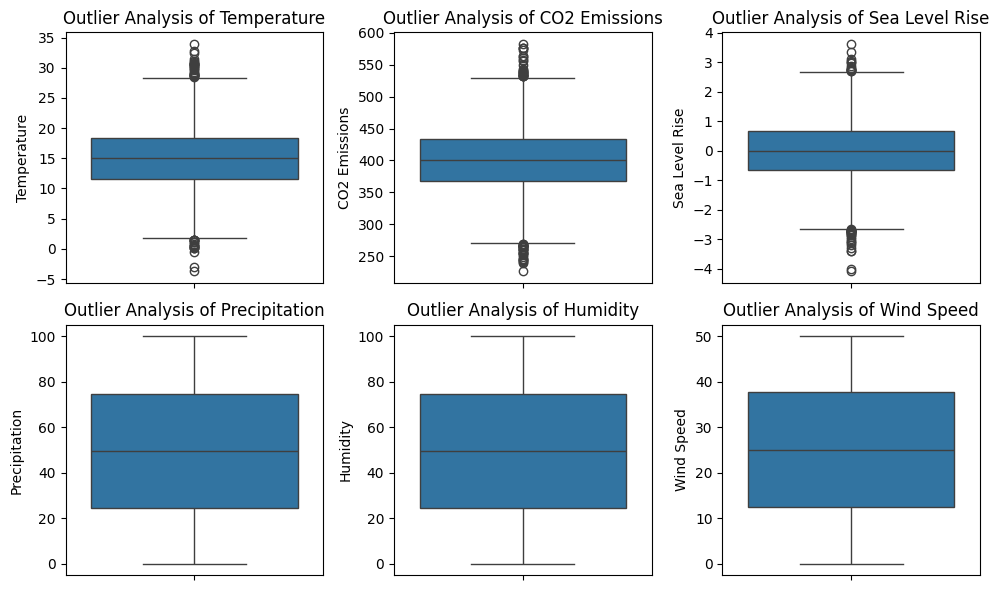

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to check for outliers
columns_to_check = ["Temperature", "CO2 Emissions", "Sea Level Rise", "Precipitation", "Humidity", "Wind Speed"]

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Loop through each column and create a box plot
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)  # Adjust the subplot grid (2 rows, 3 columns)
    sns.boxplot(y=df[column])
    plt.title(f'Outlier Analysis of {column}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


REMOVING THE OUTLIERS

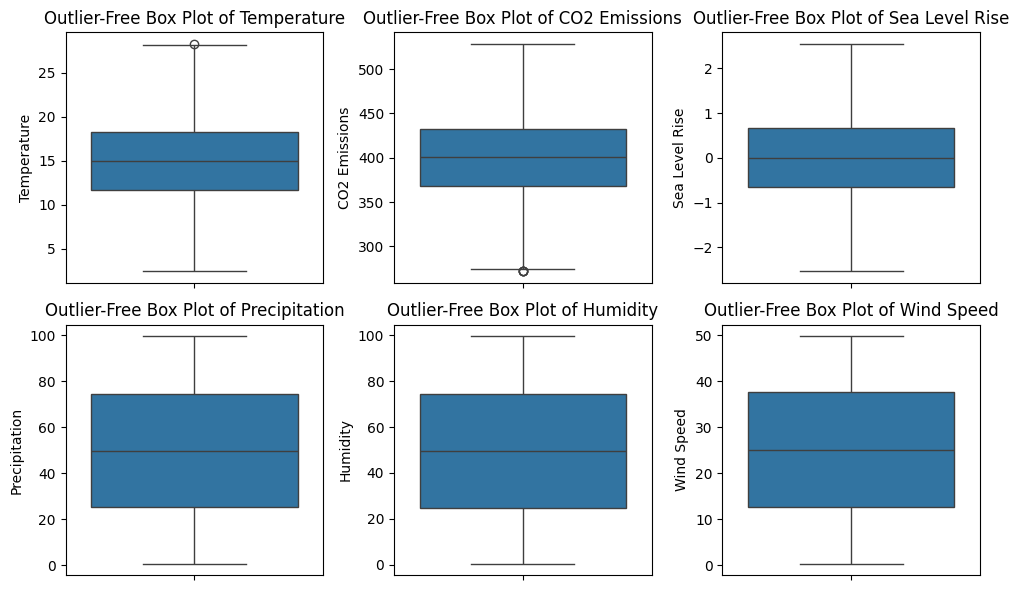

In [ ]:
# List of columns to check for outliers
columns_to_check = ["Temperature", "CO2 Emissions", "Sea Level Rise", "Precipitation", "Humidity", "Wind Speed"]

# Function to remove outliers using the IQR method
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to remove outliers from the DataFrame
df = remove_outliers(df, columns_to_check)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Loop through each column and create a box plot for the cleaned data
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)  # Adjust the subplot grid (2 rows, 3 columns)
    sns.boxplot(y=df[column])
    plt.title(f'Outlier-Free Box Plot of {column}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


TIME SERISE RELATIONSHIP

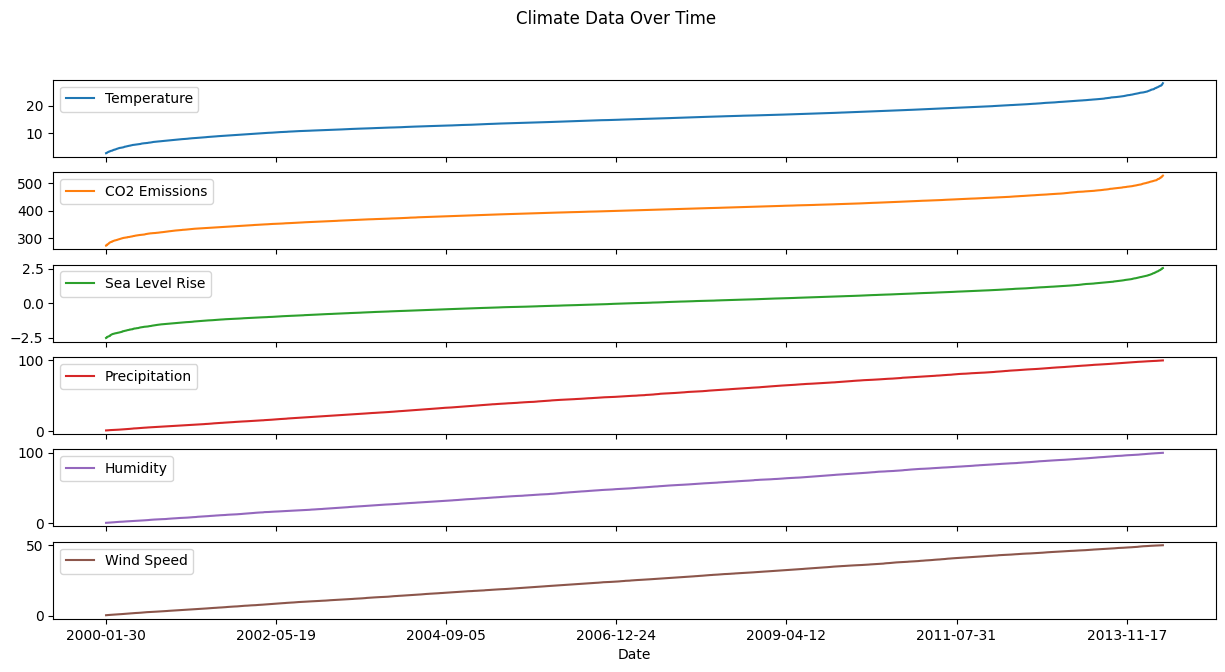

In [ ]:
# Reset the index to make 'Date' a column again
df = df.reset_index()

# Setting 'Date' column as the index
df.set_index('Date', inplace=True)

# Plotting
gr = df.plot(figsize=(15, 7), subplots=True, title='Climate Data Over Time')

# Adjusting legend size for each subplot
for ax in gr:
    legend = ax.legend()
    if legend:
        legend.prop.set_size(14)
    plt.show()

In [ ]:
df

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
Date,,,,,,
2000-01-30,2.459094,271.869627,-2.532178,0.554673,0.465128,0.351737
2000-01-31,2.498952,272.141352,-2.526726,0.556854,0.475953,0.351852
2000-02-01,2.499948,272.360468,-2.507996,0.562310,0.492939,0.357229
2000-02-01,2.500709,272.377072,-2.503550,0.581460,0.496279,0.359376
2000-02-02,2.610908,274.166728,-2.502087,0.585151,0.516965,0.366536
...,...,...,...,...,...,...
2014-05-12,27.944249,526.462760,2.525490,99.548290,99.522971,49.747270
2014-05-13,28.001380,527.558324,2.534414,99.567020,99.530741,49.748959
2014-05-14,28.104269,527.792972,2.537980,99.569553,99.539312,49.758449


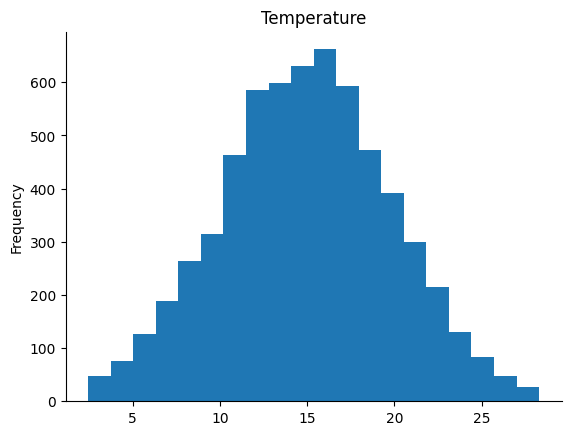

In [ ]:
# @title Temperature

from matplotlib import pyplot as plt
df['Temperature'].plot(kind='hist', bins=20, title='Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

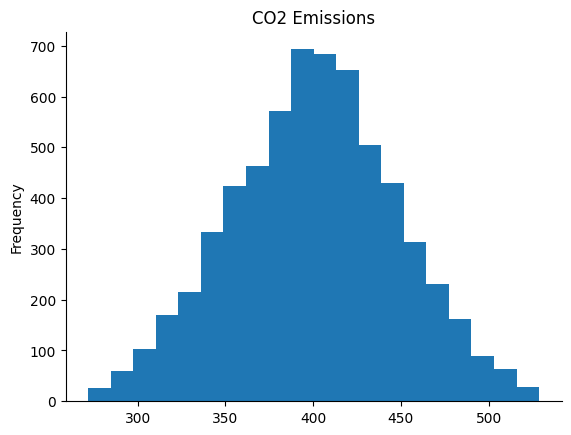

In [ ]:
# @title CO2 Emissions

from matplotlib import pyplot as plt
df['CO2 Emissions'].plot(kind='hist', bins=20, title='CO2 Emissions')
plt.gca().spines[['top', 'right',]].set_visible(False)

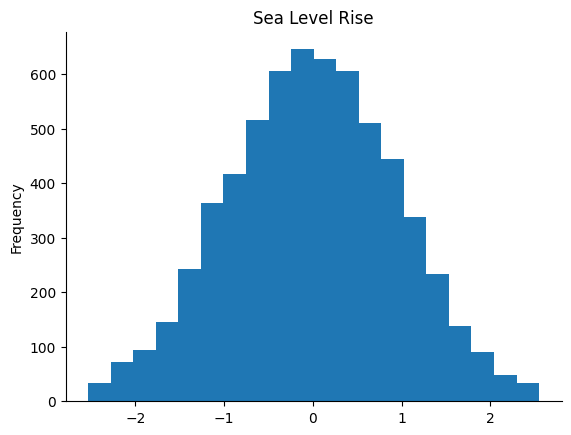

In [ ]:
# @title Sea Level Rise

from matplotlib import pyplot as plt
df['Sea Level Rise'].plot(kind='hist', bins=20, title='Sea Level Rise')
plt.gca().spines[['top', 'right',]].set_visible(False)

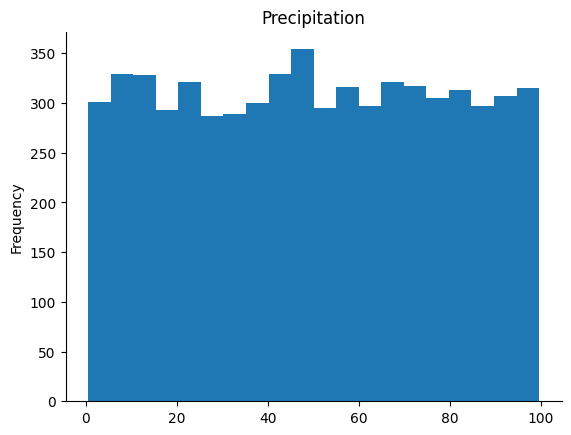

In [ ]:
# @title Precipitation

from matplotlib import pyplot as plt
df['Precipitation'].plot(kind='hist', bins=20, title='Precipitation')
plt.gca().spines[['top', 'right',]].set_visible(False)

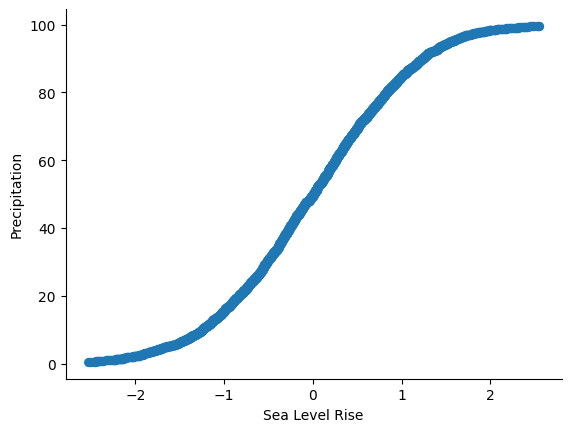

In [ ]:
# @title Sea Level Rise vs Precipitation

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Sea Level Rise', y='Precipitation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

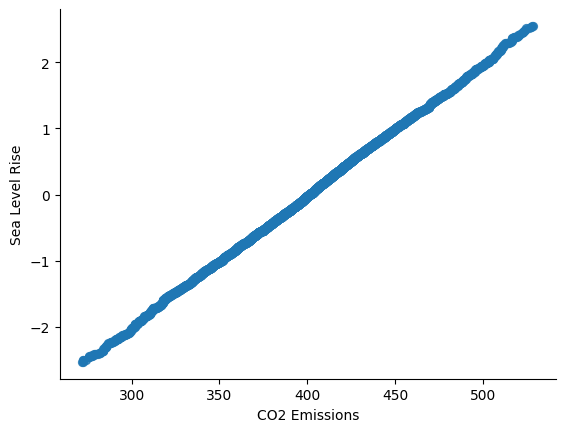

In [ ]:
# @title CO2 Emissions vs Sea Level Rise

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='CO2 Emissions', y='Sea Level Rise', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

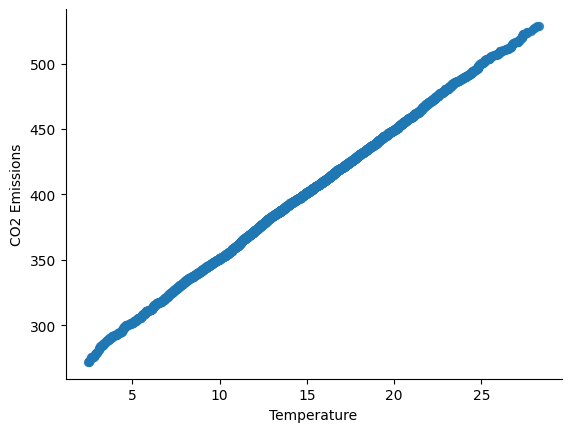

In [ ]:
# @title Temperature vs CO2 Emissions

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Temperature', y='CO2 Emissions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

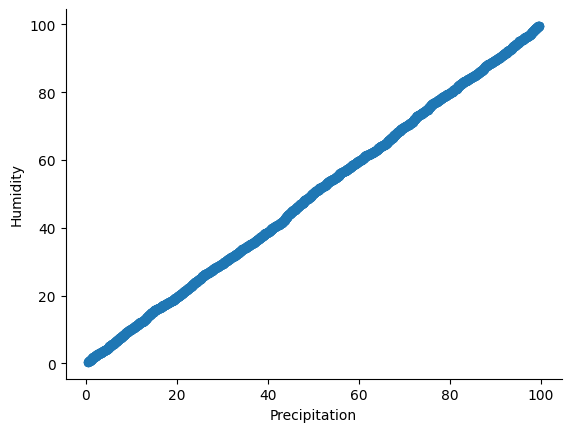

In [ ]:
# @title Precipitation vs Humidity

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Precipitation', y='Humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

CORRELATION MATRIX

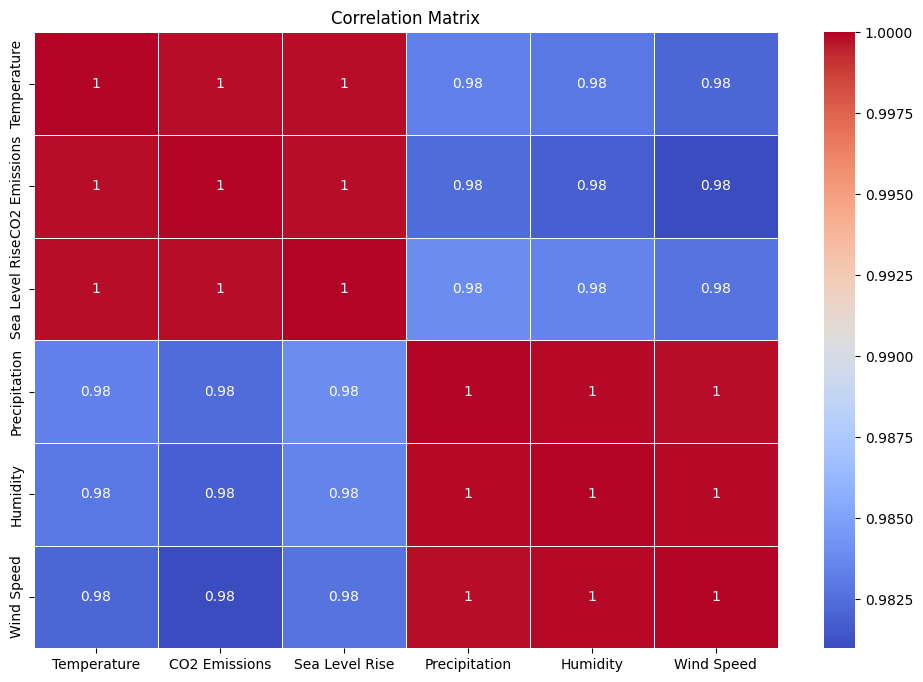

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

SELECTING FEATURES AND TARGET COLUMN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your dataframe
# Define the features and target variable if you have a target column
# For instance, if 'confidence' is your target variable:
X = df['Temperature']
Y = df[['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']]

In [ ]:
X

,Temperature
Date,
2000-01-30,2.459094
2000-01-31,2.498952
2000-02-01,2.499948
2000-02-01,2.500709
2000-02-02,2.610908
...,...
2014-05-12,27.944249
2014-05-13,28.001380
2014-05-14,28.104269


In [ ]:
Y

,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
Date,,,,,
2000-01-30,271.869627,-2.532178,0.554673,0.465128,0.351737
2000-01-31,272.141352,-2.526726,0.556854,0.475953,0.351852
2000-02-01,272.360468,-2.507996,0.562310,0.492939,0.357229
2000-02-01,272.377072,-2.503550,0.581460,0.496279,0.359376
2000-02-02,274.166728,-2.502087,0.585151,0.516965,0.366536
...,...,...,...,...,...
2014-05-12,526.462760,2.525490,99.548290,99.522971,49.747270
2014-05-13,527.558324,2.534414,99.567020,99.530741,49.748959
2014-05-14,527.792972,2.537980,99.569553,99.539312,49.758449


SPLITING THE DATASET INTO TRAINING AND TESTING

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If you do not have a target variable and want to split the whole dataframe
# df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4971,)
X_test shape: (1243,)
y_train shape: (4971, 5)
y_test shape: (1243, 5)
